In [1]:
from zipfile import ZipFile
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls "/content/gdrive"

MyDrive


In [3]:
with ZipFile('/content/gdrive/MyDrive/SML/Data.zip','r') as zipObj:
  zipObj.extractall('content/SML')

In [4]:
!pwd
%cd /content/content/SML
!pwd

/content
/content/content/SML
/content/content/SML


In [15]:
# Import necessary libraries
import pandas as pd
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from skimage import io
from PIL import Image
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
class ImageDataset(Dataset):
    def __init__(self, csv_path: str, transform: transforms = None):
        self.dataset_df = pd.read_csv(csv_path)
        self.transform = transform

    def __len__(self):
        return len(self.dataset_df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_path = self.dataset_df.iloc[idx, 0]

        image = Image.fromarray(io.imread(img_path))

        if self.transform:
            image = self.transform(image)
        sample = {"X": image}
        return sample
def create_csv(images_dir: str, csv_path: str) -> int:
    image_paths = []
    for root, dirs, imgs in os.walk(images_dir):
        for img in imgs:
            img_path = os.path.join(root, img)
            # Check if the file is an image
            if img.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                image_paths.append(img_path)

    test_data = {"ImagePaths": image_paths}
    test_df = pd.DataFrame(test_data)
    full_csv_path = os.path.abspath(csv_path)
    print(f"CSV file saved at: {full_csv_path}")
    test_df.to_csv(csv_path, index=False)
    return len(test_df)


In [16]:
!pwd

/content/content/SML


In [17]:
# Set the path to the directory containing images - need to edit the paths accordingly
images_directory = "/content/content/SML/Data/Images"
# Set the desired CSV file name
csv_file_path = "Image_data.csv"
# Create the CSV file
create_csv(images_directory, csv_file_path)

CSV file saved at: /content/content/SML/Image_data.csv


494

In [18]:
transform = transforms.Compose([transforms.Resize((244, 488)), transforms.ToTensor()])
dataset = ImageDataset(csv_path=csv_file_path, transform=transform)
loader = DataLoader(dataset, batch_size=4, shuffle=True)
#we can change this
desired_image_size = (244, 488)
print("size of image for now",desired_image_size)
applied_transforms = transform
total_images = len(dataset)
print("total imahes",total_images)

size of image for now (244, 488)
total imahes 494


In [19]:
# 4. What is the split sizes? [train, test, and val]
# Assuming 70% train, 15% test, and 15% validation
train_size = int(0.7 * total_images)
test_val_size = total_images - train_size
train_dataset, test_val_dataset = torch.utils.data.random_split(
    dataset, [train_size, test_val_size]
)
test_size = test_val_size // 2
val_size = test_val_size - test_size
test_dataset, val_dataset = torch.utils.data.random_split(
    test_val_dataset, [test_size, val_size]
)


In [20]:
!pwd

/content/content/SML


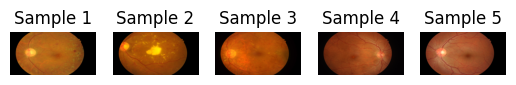

In [21]:
def visualize_random_images(dataset, num_samples=5):
    samples = random.sample(range(len(dataset)), num_samples)
    for i, sample_idx in enumerate(samples):
        sample = dataset[sample_idx]
        image = transforms.ToPILImage()(sample["X"]).convert("RGB")
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image)
        plt.axis("off")
        plt.title(f"Sample {i + 1}")
    plt.show()

visualize_random_images(train_dataset)

In [22]:
# Display some basic information about the dataset
print(f"Total number of images: {total_images}")
print(f"Train set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")
print(f"Validation set size: {len(val_dataset)}")

Total number of images: 494
Train set size: 345
Test set size: 74
Validation set size: 75


In [23]:
# Visualize the distribution of image sizes
image_sizes = [transforms.ToPILImage()(sample["X"]).size for sample in dataset]
widths, heights = zip(*image_sizes)


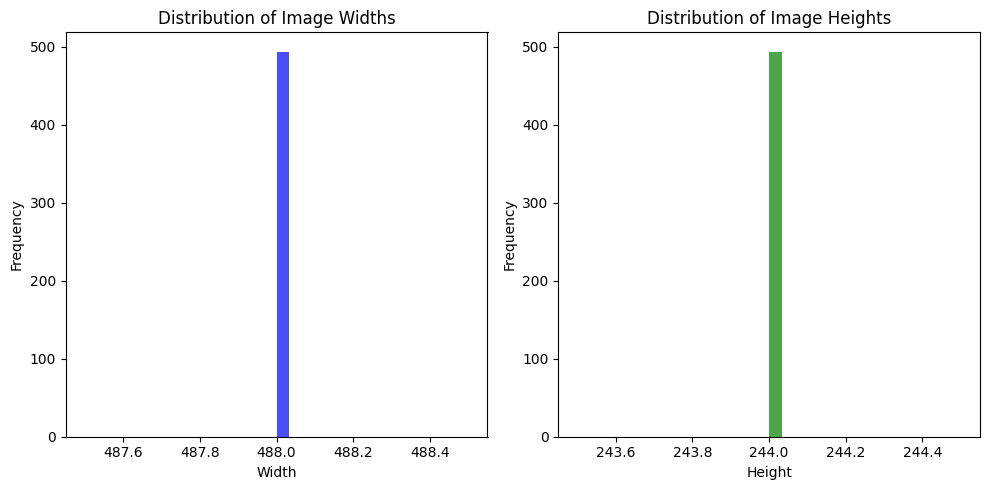

In [24]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, color='green', alpha=0.7)
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



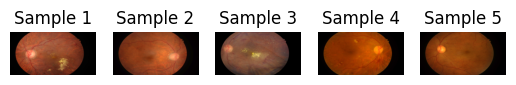

Index(['ImagePaths'], dtype='object')


In [25]:
# Visualize a few random images from the dataset
visualize_random_images(dataset, num_samples=5)

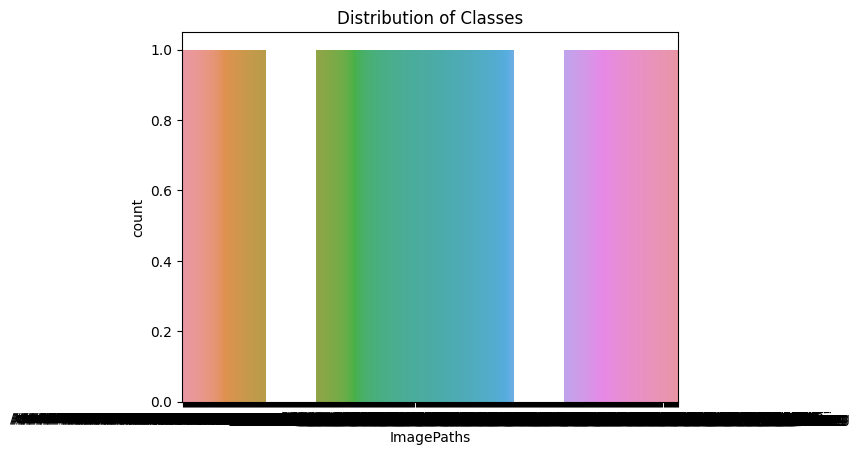

In [28]:
sns.countplot(x='ImagePaths', data=dataset.dataset_df)
plt.title('Distribution of Classes')
plt.show()